# List 9

## Data analysis

### Knowledge & Skills:

 - Data loading
 - Data ploting
 - Corellation calculation
 - Box plot interpretation
 - [Data for use](https://www.kaggle.com/mknorps/births)


In [3]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
import matplotlib.gridspec as gridspec
from scipy import stats

pd.set_option('display.max_rows', None)
sns.set_style("whitegrid")

min_year = 2002
max_year = 2017
path = "Data_Regions/"

Exercise 1
============

**Load data into ANY environment**

In [4]:
regions = pd.read_csv(path + 'regions_lon_lat.csv', sep=',')
regions

,Województwo,Stolica,lon,lat
0,dolnośląskie,Wrocław,17.033333,51.116667
1,kujawsko-pomorskie,Toruń,18.616667,53.033333
2,lubelskie,Lublin,22.568440,51.400000
3,lubuskie,Zielona Góra,15.050000,51.933333
4,łódzkie,Łódź,19.466667,51.783333
5,małopolskie,Kraków,19.950000,50.050000
6,mazowieckie,Warszawa,21.033333,52.200000
7,opolskie,Opole,17.933333,50.666667
8,podkarpackie,Rzeszów,22.016667,50.050000
9,podlaskie,Białystok,23.016667,53.133333


In [5]:
births_load = []
for x in range(min_year, max_year):
    births_load.append(pd.read_csv(path + "regions_pl_uro_{}_00_2p.csv".format(x),index_col=0, usecols=list(range(1,14))))

births = pd.concat(births_load, keys = list(range(min_year, max_year)))

index_years = births.index.levels[0]
index_regions = births.index.levels[1].str.strip()

births.index = pd.MultiIndex.from_product([index_years, index_regions], names=['year', 'region'])
births.replace('-', 0, inplace=True)
births['9'] = births[['9']].astype(float)
births.T

year                2002                                                \
region      DOLNOŚLĄSKIE KUJAWSKO-POMORSKIE LUBELSKIE LUBUSKIE ŁÓDZKIE   
total              24588              20238     20908     9486   22258   
1                  12684              10074      9548     4730   11419   
2                   7543               6132      6437     2926    7113   
3                   2620               2253      2691     1016    2325   
4                    904                887      1134      427     787   
5                    418                453       512      193     316   
6                    198                196       275       85     160   
7                    113                108       148       43      59   
8                     48                 65        81       37      34   
9                     26                 28        42       14      16   
10 i dalsze           34                 40        37       15      25   
nieustalona            0                  2         3        0       4   

year                                                                 \
region      MAŁOPOLSKIE MAZOWIECKIE OPOLSKIE PODKARPACKIE PODLASKIE   
total             32451       46627     8506        21414     11318   
1                 14710       23028     3938         9488      5032   
2                 10254       14821     2704         6592      3526   
3                  4194        5201     1043         2856      1528   
4                  1723        1979      459         1239       646   
5                   773         848      178          616       290   
6                   360         362       70          297       141   
7                   189         186       50          151        64   
8                   121          90       29           82        35   
9                    52          67       13           40        26   
10 i dalsze          72          44       22           53        29   
nieustalona           3           1        0            0         1   

year               ...                2016                                  \
region             ...         MAZOWIECKIE OPOLSKIE PODKARPACKIE PODLASKIE   
total              ...               59586     8634        20262     11373   
1                  ...               27917     4041         8803      4931   
2                  ...               23041     3310         7781      4456   
3                  ...                6419      923         2705      1408   
4                  ...                1449      218          645       372   
5                  ...                 476       75          213       119   
6                  ...                 163       45           72        40   
7                  ...                  72       11           25        22   
8                  ...                  26        4           11        16   
9                  ...                  15        2            3         2   
10 i dalsze        ...                   8        2            4         7   
nieustalona        ...                   0        3            0         0   

year                                                              \
region      POMORSKIE ŚLĄSKIE ŚWIĘTOKRZYSKIE WARMIŃSKO-MAZURSKIE   
total           25865   42742          10610               13443   
1               11592   19926           4930                5991   
2                9711   16571           4253                5129   
3                3187    4480           1054                1516   
4                 865    1112            250                 482   
5                 290     381             82                 169   
6                 106     155             21                  81   
7                  62      66             10                  41   
8                  27      22              5                  18   
9                   7      15              2                  10   
10 i dalsze        16      13              3               

Exercise 2
============

**Compute pearson corellation (in python: [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html))**
- 1 kid vs more kids in years
- for each region
- for all regions

In [11]:
def pearsonCorellationbyRegion(x):
    columns = ['2', '3', '4', '5', '6', '7', '8', '9', '10 i dalsze']
    x['>1'] = x[columns].sum(axis=1)
    x = x[['1', '>1']]
    pc, _ = stats.pearsonr(x['1'].values.tolist(), x['>1'].values.tolist())
    print('\t{}\t\t: {}'.format(x.index.get_level_values(1)[0], pc))

def pearsonCorellationbyAllRegions(x):
    columns = ['2', '3', '4', '5', '6', '7', '8', '9', '10 i dalsze']
    x['>1'] = x[columns].sum(axis=1)
    x = x[['1', '>1']]
    pc, _ = stats.pearsonr(x['1'].values.tolist(), x['>1'].values.tolist())
    print('\nPearson corellation for all regions: {}'.format(pc))
    
print('Pearson corellation for:')
births.groupby(births.index.get_level_values(1), axis=0).apply(pearsonCorellationbyRegion)

x = births.groupby('year', axis=0).sum()
pearsonCorellationbyAllRegions(x)

Pearson corellation for:
	DOLNOŚLĄSKIE		: 0.5290304754946848
	KUJAWSKO-POMORSKIE		: 0.5904742804366891
	LUBELSKIE		: 0.6865865616486752
	LUBUSKIE		: 0.4420015590043594
	MAZOWIECKIE		: 0.736413991179257
	MAŁOPOLSKIE		: 0.6742805458084914
	OPOLSKIE		: 0.2793491132322239
	PODKARPACKIE		: 0.4183363438398636
	PODLASKIE		: 0.22312513327452385
	POMORSKIE		: 0.5929623161443875
	WARMIŃSKO-MAZURSKIE		: 0.7167029883072172
	WIELKOPOLSKIE		: 0.5570063503876023
	ZACHODNIOPOMORSKIE		: 0.4313443102616612
	ŁÓDZKIE		: 0.6170764617719016
	ŚLĄSKIE		: 0.3865640025360878
	ŚWIĘTOKRZYSKIE		: 0.746850136609003
year
2002    182591.0
2003    175587.0
2004    176438.0
2005    178875.0
2006    183342.0
2007    191634.0
2008    205015.0
2009    205725.0
2010    207104.0
2011    198272.0
2012    198932.0
2013    190669.0
2014    197887.0
2015    193311.0
2016    206263.0
Name: >1, dtype: float64
year
2002    172892.0
2003    177167.0
2004    181433.0
2005    187213.0
2006    192670.0
2007    198066.0
2008    211419.

Exercise 3
============

**Plot box plots of data:**
- each region and all regions
- each year and before 500+ after 500+

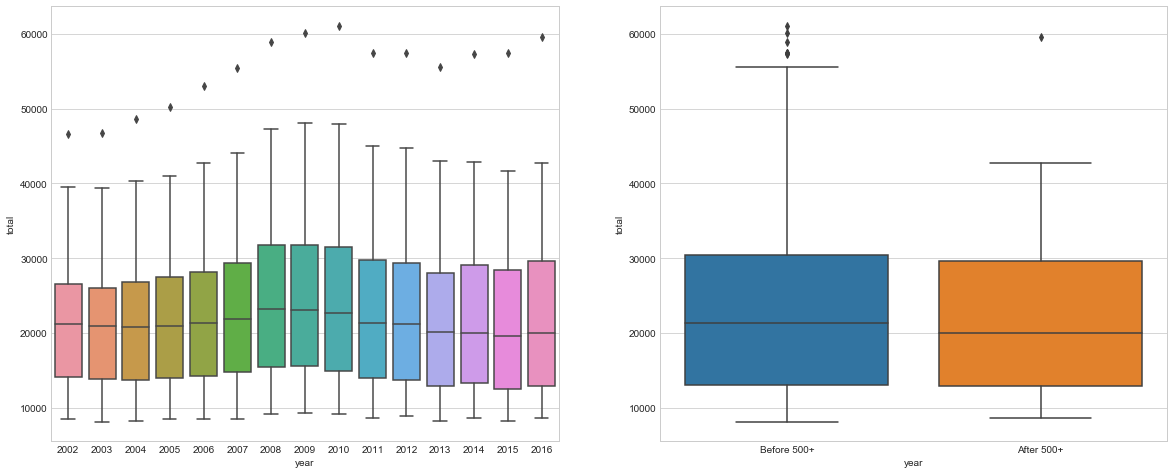

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

x = pd.DataFrame(births)
sns.boxplot(x=x.index.get_level_values(0), y="total", data=x, ax=ax[0])

y1 = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) < 2016]

y1['year'] = 'Before 500+'
y2 = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) >= 2016]
y2['year'] = 'After 500+'

y = pd.concat([y1, y2], axis=0)
sns.boxplot(x='year', y='total', data=y, ax=ax[1])
None

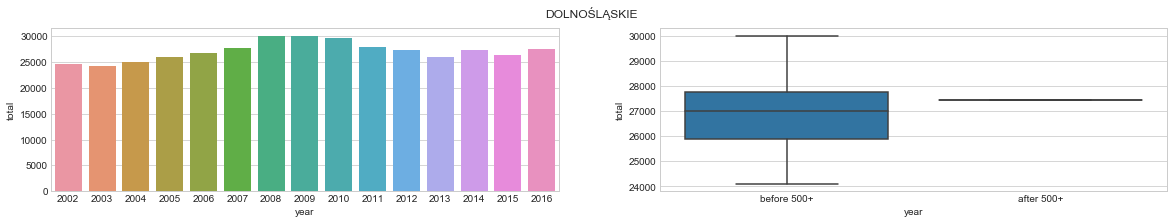

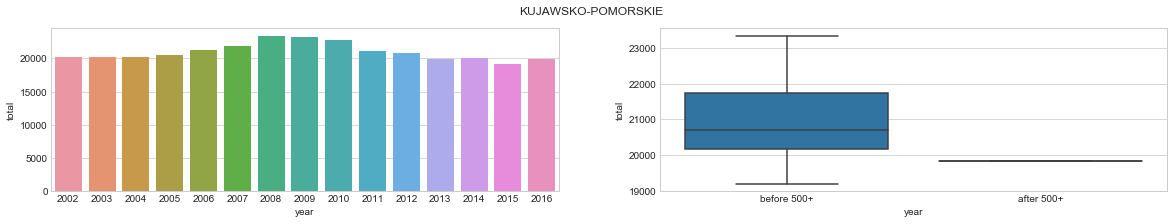

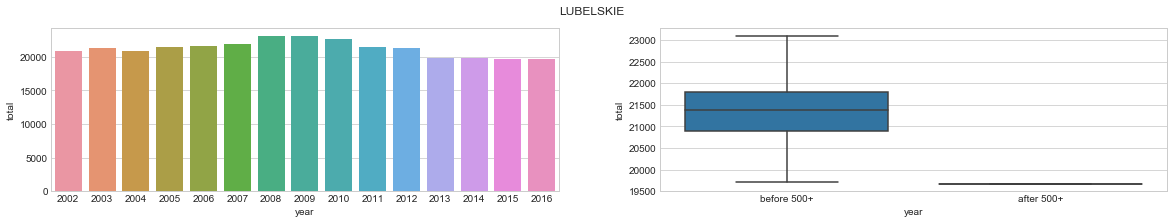

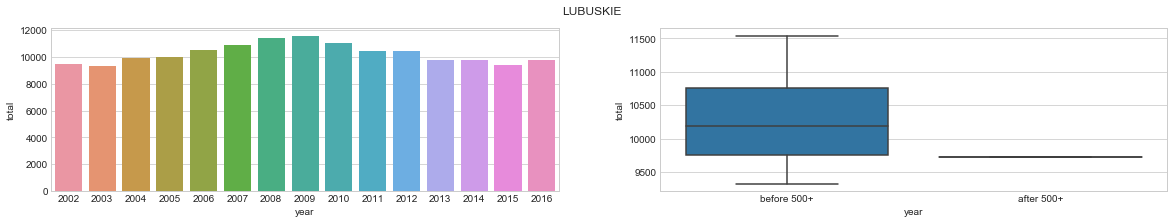

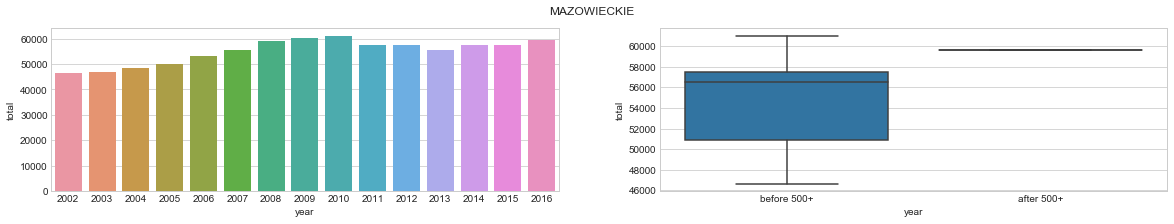

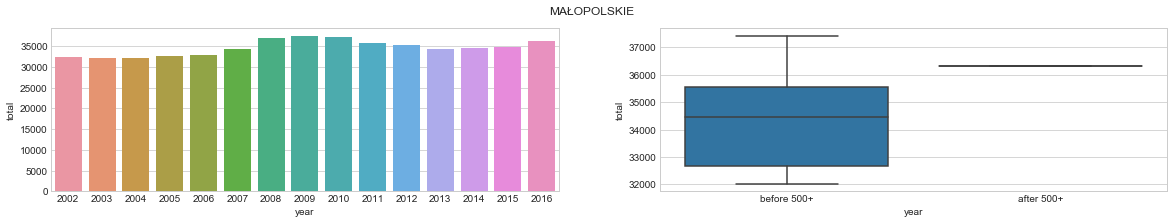

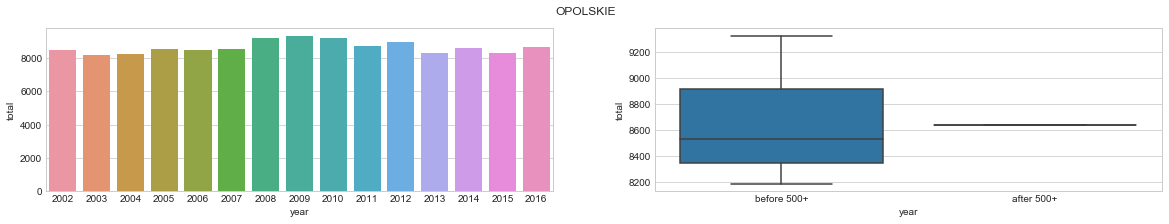

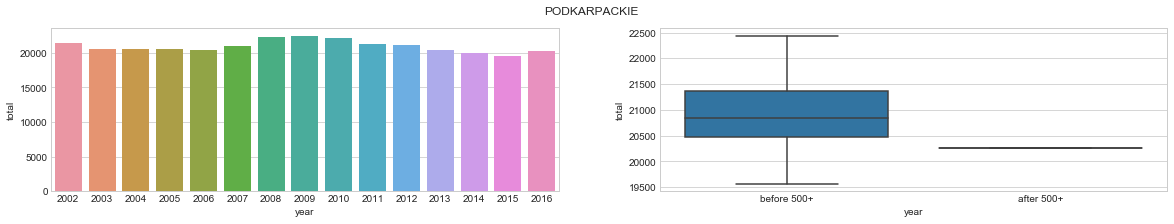

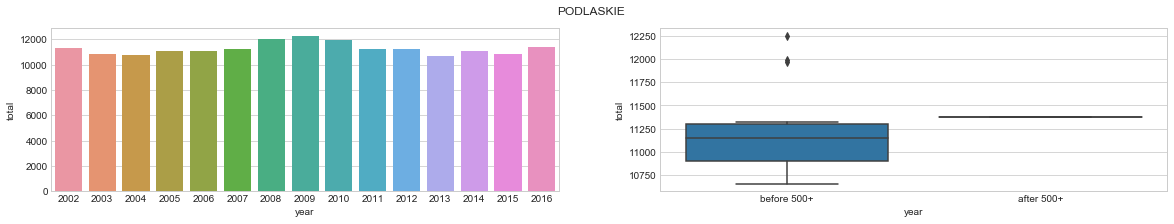

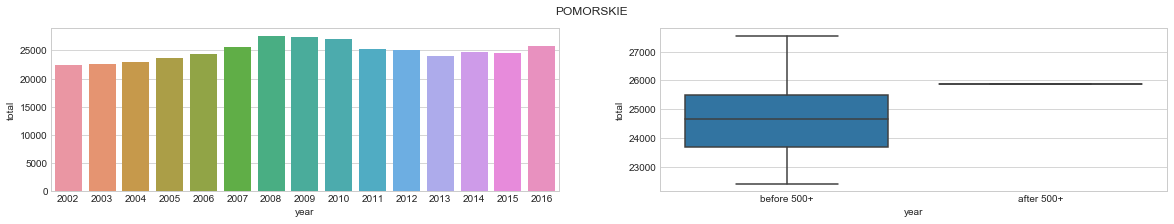

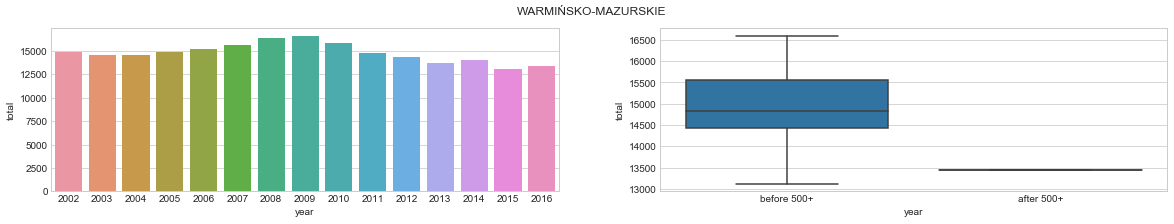

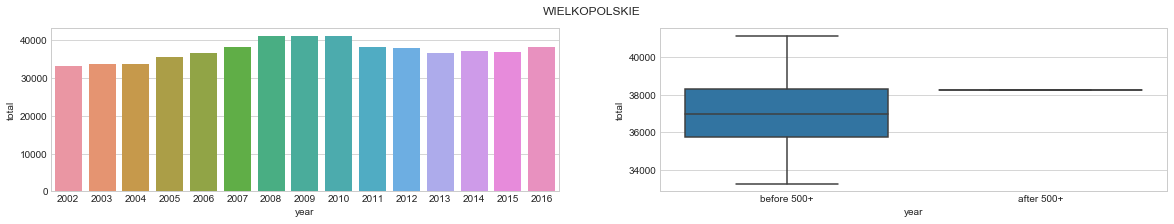

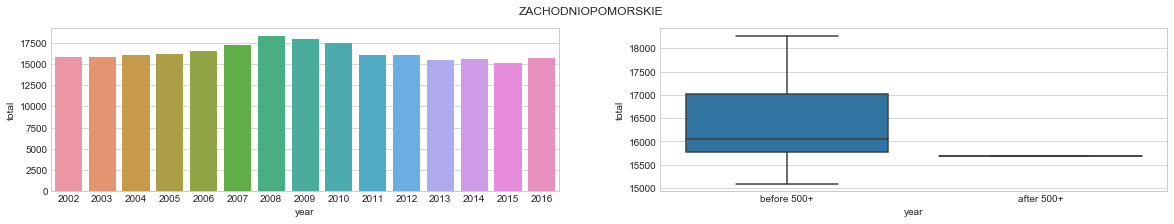

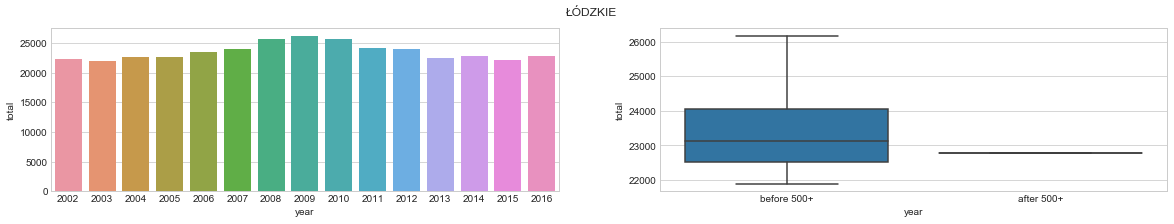

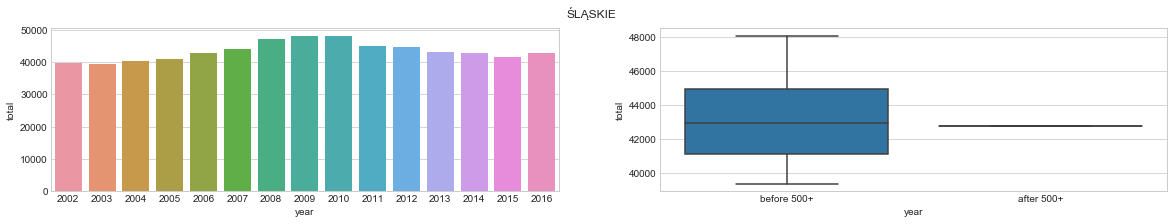

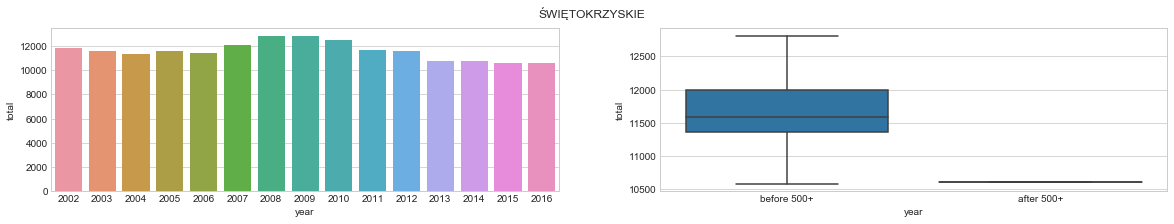

In [193]:
def byRegionPlot(region):
    x = pd.DataFrame(region)
    fig, ax = plt.subplots(1, 2, figsize=(20,3))
    fig.suptitle(region.index.get_level_values(1)[0])
    sns.barplot(x=x.index.get_level_values(0), y='total', data=x, ax=ax[0])
    y1 = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) < 2016]
    y1['year'] = 'before 500+'
    y2 = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) >= 2016]
    y2['year'] = 'after 500+'
    y = pd.concat([y1, y2], axis=0)
    sns.boxplot(x='year', y='total', data=y, ax=ax[1])

births.groupby(births.index.get_level_values(1), axis=0).apply(byRegionPlot)
None

Exercise 4
============

**Analyse plots:**
- what is on box plot? can you help yourself somehow in order to do analysis
- can you see 500+ effect?

region,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE,MAŁOPOLSKIE,OPOLSKIE,PODKARPACKIE,PODLASKIE,POMORSKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ZACHODNIOPOMORSKIE,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,SUM
after,27452.000000,19840.000000,19666.000000,9734.000000,59586.000000,36331.000000,8634.000000,20262.000000,11373.000000,25865.000000,13443.000000,38237.000000,15688.000000,22794.000000,42742.000000,10610.000000,382257.000000
before,27016.357143,21042.142857,21363.428571,10269.642857,54719.928571,34463.428571,8652.214286,20995.857143,11248.642857,24794.214286,14902.785714,37217.928571,16378.500000,23556.000000,43401.428571,11658.928571,381681.428571
change [%],1.612515,-5.713025,-7.945488,-5.215789,8.892686,5.418995,-0.210516,-3.495247,1.105530,4.318692,-9.795388,2.738120,-4.215893,-3.234845,-1.519371,-8.996784,0.150799


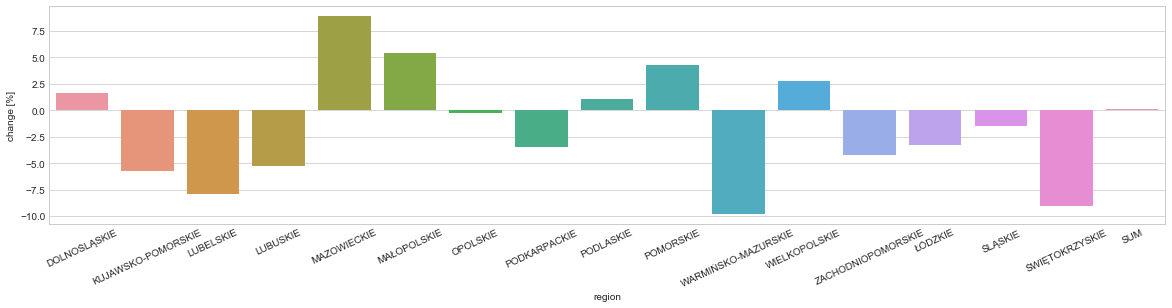

In [206]:
def byRegionMean(region):
    x = pd.DataFrame(region)
    before = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) < 2016]
    after = pd.DataFrame(x)[x.index.get_level_values('year').astype(int) >= 2016]
    beforeNumeric = before[['total']].mean().astype(float)
    afterNumeric = after[['total']].mean().astype(float)
    change = (afterNumeric - beforeNumeric) * 100 / beforeNumeric
    return pd.Series({
        'before': beforeNumeric,
        'after': afterNumeric,
        'change [%]': change,
    }, dtype=float)

x = births.groupby(births.index.get_level_values('region'), axis=0).apply(byRegionMean)
afterNumeric = x[['after']].sum(axis=0).values[0]
beforeNumeric = x[['before']].sum(axis=0).values[0]
x = x.append(pd.Series([afterNumeric, beforeNumeric, (afterNumeric - beforeNumeric) * 100 / beforeNumeric], 
    index=['after', 'before', 'change [%]'], name='SUM'))

plt.figure(figsize=(20,4))
ax = sns.barplot(x=x.index.get_level_values(0), y='change [%]', data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
x.T